In [0]:
import pandas as pd
face_df = pd.read_csv("face.csv", encoding="utf-8")

In [2]:
import numpy as np
encodings = []
for e in face_df["Encoding"]:
    encodings.append(np.array(eval(e)))
encodings = np.array(encodings)
labels = np.array(face_df["Name"])
labels

array(['林俊傑', '周杰倫', '新垣結衣', '阿信', '長澤雅美', '林志玲'], dtype=object)

In [3]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
import zipfile
z = zipfile.ZipFile("/gdrive/My Drive/detect.zip")
z.extractall("detect")

In [10]:
import glob
c = glob.glob("detect/chiling/*")
cl = ["林志玲"] * len(c)
y = glob.glob("detect/yui/*")
yl = ["新垣結衣"] * len(y)
detect_df = pd.DataFrame({
    "path":c + y,
    "label":cl + yl
})
detect_df

,path,label
0,detect/chiling/535.jpg,林志玲
1,detect/chiling/5.jpg,林志玲
2,detect/chiling/205.jpg,林志玲
3,detect/chiling/170.jpg,林志玲
4,detect/chiling/62.jpg,林志玲
5,detect/chiling/314.jpg,林志玲
6,detect/chiling/131.jpg,林志玲
7,detect/chiling/342.jpg,林志玲
8,detect/chiling/20.jpg,林志玲
9,detect/chiling/543.jpeg,林志玲


In [7]:
!pip install face-recognition

     |████████████████████████████████| 100.2MB 299kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566176 sha256=80ef58e6c8d9315624f21a9913631ea5e39c23651311b38c6748f8d1b68c8192
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [11]:
# demo一個
import face_recognition
f = "detect/yui/571.jpg"
img = face_recognition.load_image_file(f)
single_en = face_recognition.face_encodings(img)

if len(single_en) == 0:
    print("未抓到臉")
elif len(single_en) > 1:
    print("不支援多臉")
else:
    distance = face_recognition.face_distance(encodings, single_en[0])

    if min(distance) < 0.5:
        idx = distance.argmin()
        print(labels[idx])
    else:
        print("無法辨識")


新垣結衣


In [16]:
def detect(f):
    try:
        img = face_recognition.load_image_file(f)
        single_en = face_recognition.face_encodings(img)

        if len(single_en) == 0:
            return "未抓到臉"
        elif len(single_en) > 1:
            return "不支援多臉"
        else:
            distance = face_recognition.face_distance(encodings, single_en[0])

            if min(distance) < 0.5:
                idx = distance.argmin()
                return labels[idx]
            else:
                return "無法辨識"
    except:
        return "未知錯誤"
result = detect_df["path"].apply(detect)
result

0        未抓到臉
1        新垣結衣
2         林志玲
3         林志玲
4         林志玲
5         林志玲
6       不支援多臉
7       不支援多臉
8         林志玲
9       不支援多臉
10        林志玲
11       無法辨識
12      不支援多臉
13       無法辨識
14        林志玲
15        林志玲
16       長澤雅美
17        林志玲
18        林志玲
19        林志玲
20        林志玲
21      不支援多臉
22       未抓到臉
23      不支援多臉
24      不支援多臉
25        林志玲
26      不支援多臉
27      不支援多臉
28      不支援多臉
29        林志玲
        ...  
1005    不支援多臉
1006    不支援多臉
1007     新垣結衣
1008     新垣結衣
1009    不支援多臉
1010     新垣結衣
1011     新垣結衣
1012     新垣結衣
1013    不支援多臉
1014    不支援多臉
1015     新垣結衣
1016    不支援多臉
1017    不支援多臉
1018    不支援多臉
1019     新垣結衣
1020     新垣結衣
1021     新垣結衣
1022     新垣結衣
1023    不支援多臉
1024     新垣結衣
1025    不支援多臉
1026     無法辨識
1027     長澤雅美
1028     新垣結衣
1029     新垣結衣
1030    不支援多臉
1031     新垣結衣
1032     無法辨識
1033     新垣結衣
1034     新垣結衣
Name: path, Length: 1035, dtype: object

In [30]:
result_df = pd.DataFrame({
    "image":detect_df["path"],
    "answer":detect_df["label"],
    "predict":result
})
# 篩選: df[跟你的資料筆數依樣多的True/False]
cond = (result_df["predict"] != "不支援多臉") & (result_df["predict"] != "未知錯誤")
final = result_df[cond]
final

,image,answer,predict
0,detect/chiling/535.jpg,林志玲,未抓到臉
1,detect/chiling/5.jpg,林志玲,新垣結衣
2,detect/chiling/205.jpg,林志玲,林志玲
3,detect/chiling/170.jpg,林志玲,林志玲
4,detect/chiling/62.jpg,林志玲,林志玲
5,detect/chiling/314.jpg,林志玲,林志玲
8,detect/chiling/20.jpg,林志玲,林志玲
10,detect/chiling/173.jpg,林志玲,林志玲
11,detect/chiling/138.jpg,林志玲,無法辨識
13,detect/chiling/132.jpg,林志玲,無法辨識


In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(final["answer"], final["predict"])

0.7146853146853147

In [57]:
from sklearn.metrics import confusion_matrix
trans = {l:i for i, l in enumerate(labels)}
trans["未抓到臉"] = len(trans)
trans["無法辨識"] = len(trans)
mat = confusion_matrix(final["answer"].replace(trans).astype(int),
                       final["predict"].replace(trans).astype(int))
c = list(labels) + ["未抓到臉", "無法辨識"]
c = [n for n in c 
        if n in final["answer"].unique() 
        or n in final["predict"].unique()]
pd.DataFrame(mat, columns=c, index=c)

,林俊傑,周杰倫,新垣結衣,長澤雅美,林志玲,未抓到臉,無法辨識
林俊傑,0,0,0,0,0,0,0
周杰倫,0,0,0,0,0,0,0
新垣結衣,1,0,284,31,1,38,37
長澤雅美,0,0,0,0,0,0,0
林志玲,0,1,21,8,227,25,41
未抓到臉,0,0,0,0,0,0,0
無法辨識,0,0,0,0,0,0,0


In [60]:
trans

{'周杰倫': 1,
 '新垣結衣': 2,
 '未抓到臉': 6,
 '林俊傑': 0,
 '林志玲': 5,
 '無法辨識': 7,
 '長澤雅美': 4,
 '阿信': 3}

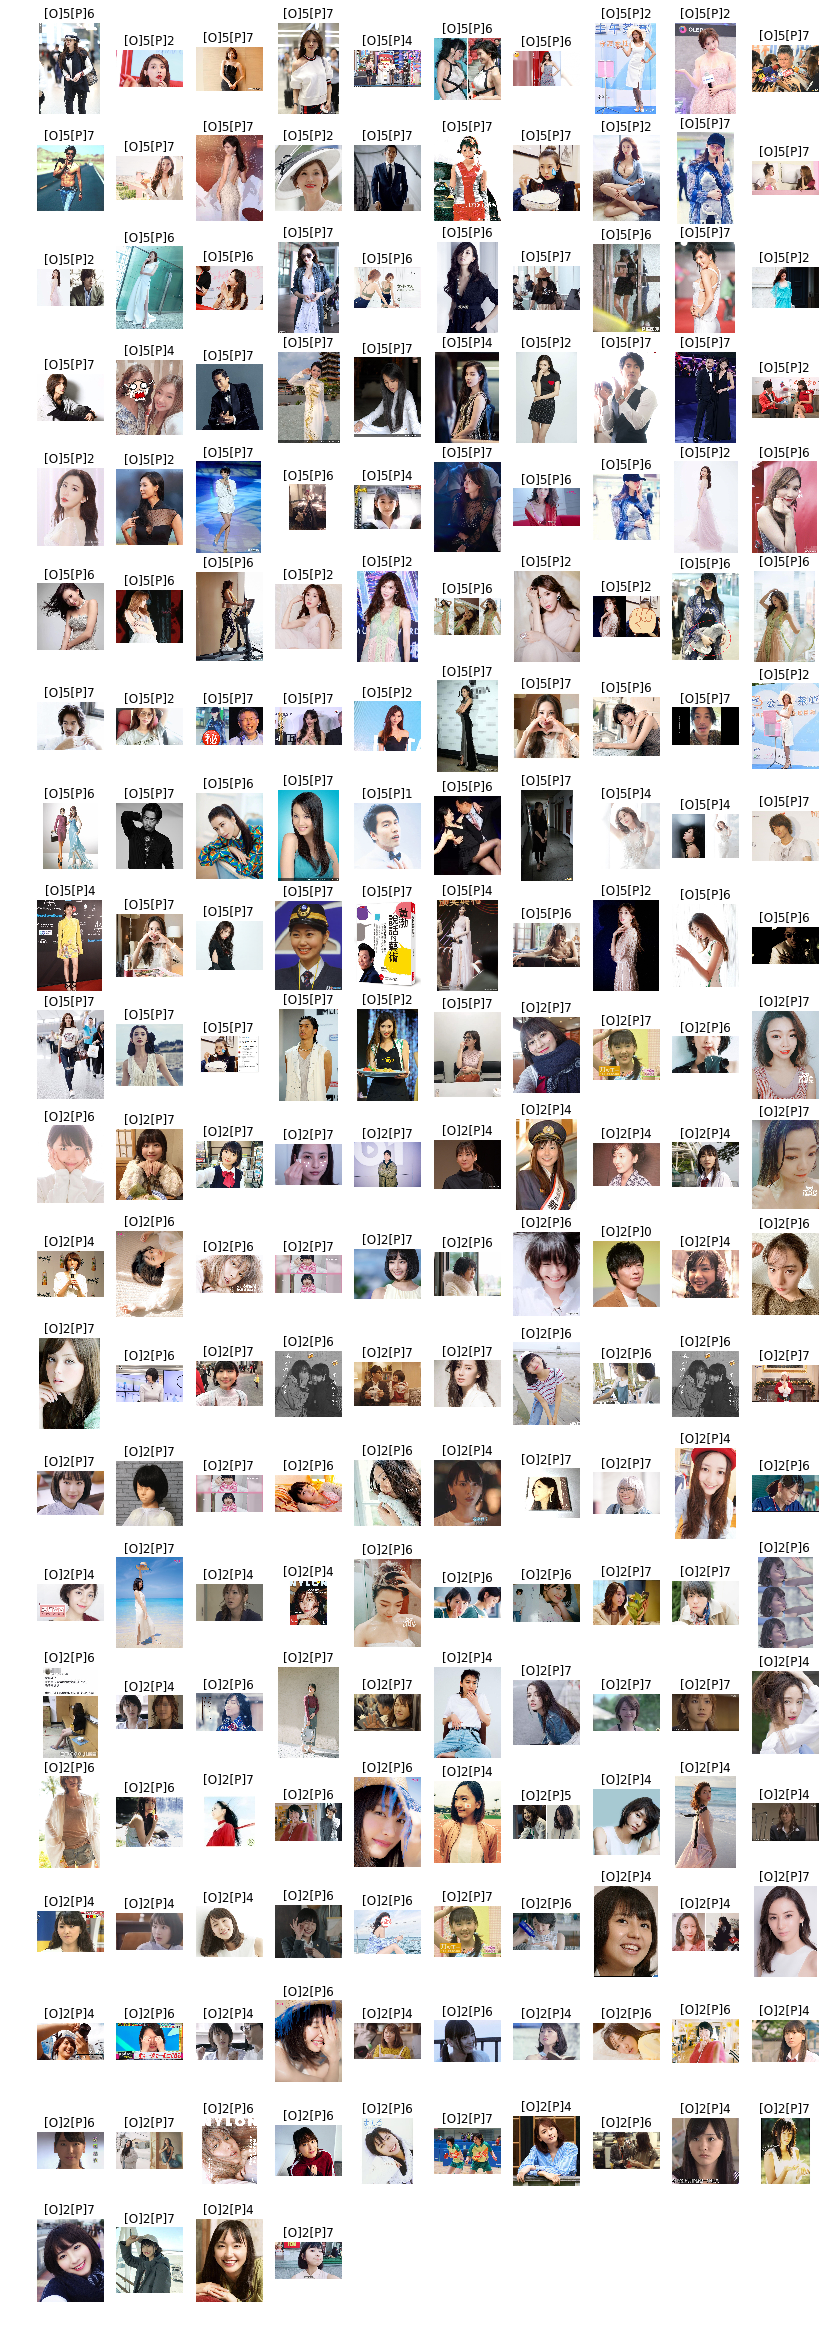

In [59]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

pre = np.array(final["predict"].replace(trans).astype(int))
y_test = np.array(final["answer"].replace(trans).astype(int))
x_test = np.array(final["image"])

idx = np.nonzero(pre != y_test)[0]
false_img = x_test[idx]
false_answer = y_test[idx]
false_pre = pre[idx]

width = 10
height = len(false_img) // width + 1
plt.figure(figsize=(14, 42))
for i, f in enumerate(false_img):
    plt.subplot(height, width, i + 1)
    t = "[O]" + str(false_answer[i]) + "[P]" + str(false_pre[i])
    plt.title(t)
    plt.axis("off")
    img = face_recognition.load_image_file(f)
    plt.imshow(img)